<h1><center> Trabajo Práctico 3: Fashion detector </center></h1>

In [1]:
# lib para trabajar con arrays
import numpy as np
# lib para trabajar con dataframe
import pandas as pd 

# lib que usamos para mostrar las imágenes
import matplotlib.pyplot as plt

# libs que usamos para construir y entrenar redes neuronales, y que además tiene utilidades para leer sets de 
# imágenes
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, Convolution2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

# libs que usamos para tareas generales de machine learning. En este caso, métricas
from sklearn.metrics import accuracy_score, confusion_matrix

# configuración para que las imágenes se vean dentro del notebook
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
# graficar
import plotly.express as px

In [2]:
def plot_train_instrumentation(epochs, data, train_param, val_param):
    
    plt.figure(figsize=(10,7))
    
    plt.plot(epochs, data[train_param], 'g', label=f'Training ({train_param})')
    plt.plot(epochs, data[val_param], 'red', label=f'Validation ({val_param})')
    
    plt.title("Training performance")
    plt.xlabel('Epochs')
    plt.ylabel(train_param)
    
    plt.legend()
    plt.show()

In [3]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(d_clases_labels[predicted_label],
                                100*np.max(predictions_array),
                                d_clases_labels[true_label]),
                                color=color)

In [4]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

# esto es para que los calores de los modelos den siempre igual
np.random.seed(3)
tf.random.set_seed(3)

(x_train, x_lab), (y_validation, y_lab) = fashion_mnist.load_data()

<h1><center>1. Análisis exploratorio</center></h1>

Presentación → 1.1 Volumetría de los datos

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
y_validation = y_validation.reshape(y_validation.shape[0], 28, 28, 1).astype('float32')
print("x_train shape {}".format(x_train.shape))
print("y_validation shape {}".format(y_validation.shape))

x_train shape (60000, 28, 28, 1)
y_validation shape (10000, 28, 28, 1)


El data set de train cuenta con 60000 imágenes de 28x28 pixeles.

El data set de validation cuenta con 10000 imágenes de 28x28 pixeles.

El target está compuesto por 10 clases, con valor entre 0 y 9.
A continuación, detallaremos que significa cada valor:

| Label | Clase |
| -- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover|
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


In [7]:
# Create a dictionary for each type of label 
d_clases_labels = {0 : "camiseta/top", 1: "Pantalón", 2: "Pulover", 3: "Vestido", 4: "Saco",
                   5: "Sandalia", 6: "Camisa", 7: "Zapatilla", 8: "Bolso", 9: "Botas"}

<h3>Normalizamos las imágenes</h3>

In [8]:
#Los valores de la imagen se encuentran entre 0 y 255, por lo cual es necesario normalizar.
x_train = keras.utils.normalize(x_train, axis = 1)

y_validation = keras.utils.normalize(y_validation, axis = 1)

### Mostramos algunas imágenes del data set de train

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(d_clases_labels[x_lab[i]])
plt.show()

### Mostramos algunas imágenes del data set de validation

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(y_validation[i])
    plt.xlabel(d_clases_labels[y_lab[i]])
plt.show()

### Distribución de la variable a predecir

In [ ]:
# Presentación → 1.3 Distribución de la variable a predecir

In [ ]:
# transformamos el array en un data frame de panda
df_train = pd.DataFrame(x_lab).rename(columns={0:'x_lab'})
# cambiamos los números de las clases po sus nombres
df_train['x_lab'] = df_train['x_lab'].map(d_clases_labels,
                             na_action=None)

In [ ]:
# Presentación → 1.3 Distribución de la variable a predecir
df = px.data.tips()
fig = px.histogram(df_train, 
                   x="x_lab", 
                   color="x_lab", 
                   title='Distribución de la variable en train', 
                   labels={'x_lab':'Target'},
                  category_orders=dict(x_lab=d_clases_labels),
                  text_auto=True)
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
# transformamos el array en un data frame de panda
df_validation = pd.DataFrame(y_lab).rename(columns={0:'y_lab'})
# cambiamos los números de las clases po sus nombres
df_validation['y_lab'] = df_validation['y_lab'].map(d_clases_labels,
                             na_action=None)

In [ ]:
# Presentación → 1.3 Distribución de la variable a predecir
df = px.data.tips()
fig = px.histogram(df_validation, 
                   x="y_lab", 
                   color="y_lab", 
                   title='Distribución de la variable en validation', 
                   labels={'y_lab':'Target'},
                  category_orders=dict(y_lab=d_clases_labels),
                  text_auto=True)

fig.update_layout(bargap=0.2)
fig.show()

<h1><center>2. Machine Learning</center></h1>

<h3>2. I) MLP simple</h3>

In [ ]:
#Definiendo modelo
model = Sequential()
model.add(Flatten(input_shape=((28, 28, 1))))
#Capa oculta con 200 neuronas
model.add(Dense(128, activation ="relu"))
model.add(Dense(10, activation ="softmax"))

#compilar el modelo
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model.fit(x_train, x_lab, epochs = 20, validation_data=(y_validation, y_lab))

In [ ]:
plt.plot(history.history['accuracy'], label='x_lab')
plt.plot(history.history['val_accuracy'], label='y_lab')
plt.title('Accuracy over train epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

### Visualizamos la predicción para cada clase en particular

In [ ]:
predictions = model.predict(y_validation)

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_lab, y_validation)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_lab)
plt.tight_layout()
plt.show()

<h3>2. II) Red Convolucional</h3>

In [9]:
# el shape de los inputs es alto_imagen * ancho_imagen * cantidad_colores
model_rc = Sequential([
    
    Convolution2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'),
    Dropout(0.2),

    Convolution2D(32, 3, 3, activation='relu'),
    Dropout(0.2),
    
    Convolution2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'),
    Dropout(0.2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(10, activation='softmax'),
])
model_rc.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy',],)

In [10]:
model_rc.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 32)          320       
                                                                 
 dropout (Dropout)           (None, 9, 9, 32)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 dropout_1 (Dropout)         (None, 3, 3, 32)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 32)          9248      
                                                                 
 dropout_2 (Dropout)         (None, 1, 1, 32)          0         
                                                                 
 flatten (Flatten)           (None, 32)                0

In [ ]:
#como esta compuesto un elemento del train
#x_train_m[0]

In [ ]:
#como esta compuesto un elemento del lab
#x_lab[0]

In [ ]:
#https://programmerclick.com/article/19151150055/
#Para convertir los datos en la memoria en Dataset
#train_dataset = tf.data.Dataset.from_tensor_slices((x_train, x_lab)).batch(64)

#test_dataset = tf.data.Dataset.from_tensor_slices((y_validation, y_lab)).batch(64)

In [11]:
history_rc = model_rc.fit(x_train, x_lab, epochs=20, batch_size=32, validation_data=(y_validation, y_lab))

Epoch 1/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.7351 - accuracy: 0.7200 - val_loss: 0.4829 - val_accuracy: 0.8155
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5263 - accuracy: 0.8051 - val_loss: 0.4379 - val_accuracy: 0.8351
Epoch 3/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4739 - accuracy: 0.8228 - val_loss: 0.4022 - val_accuracy: 0.8511
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4490 - accuracy: 0.8332 - val_loss: 0.3814 - val_accuracy: 0.8563
Epoch 5/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4322 - accuracy: 0.8378 - val_loss: 0.3767 - val_accuracy: 0.8583
Epoch 6/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4186 - accuracy: 0.8448 - val_loss: 0.3601 - val_accuracy: 0.8669
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4083 - accuracy: 0.8479 - val_loss: 0.3570 - val_ac

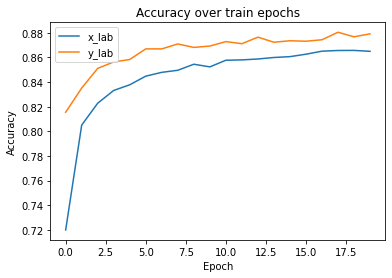

In [12]:
plt.plot(history_rc.history['accuracy'], label='x_lab')
plt.plot(history_rc.history['val_accuracy'], label='y_lab')
plt.title('Accuracy over train epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [13]:
predictions_rc = model_rc.predict(y_validation)

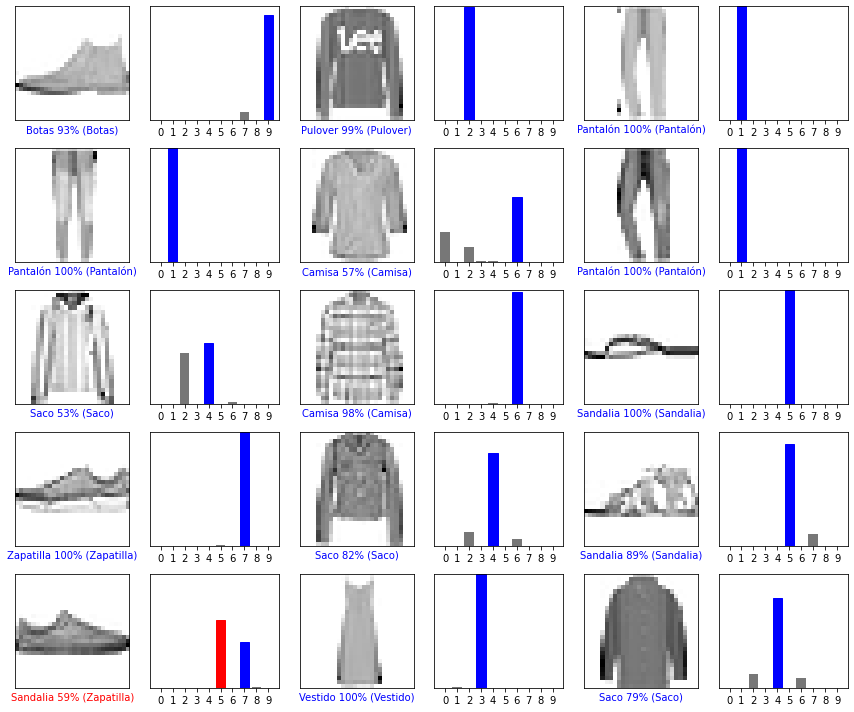

In [14]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_rc[i], y_lab, y_validation)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_rc[i], y_lab)
plt.tight_layout()
plt.show()

## Tecnica de aumentacion de datos

In [15]:
x_train_m = x_train

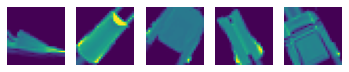

In [16]:
# Create data augmentation object
data_augmentor = ImageDataGenerator(rotation_range=60, 
                                    width_shift_range=0.1, 
                                    height_shift_range=0.1,
                                    brightness_range=(0.5, 1.5),
                                    horizontal_flip=True,)
# fit the training data
data_augmentor.fit(x_train_m)
augment = data_augmentor.flow(x_train_m[0:9], batch_size=1)

for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.imshow(augment.next().squeeze())
    plt.axis('off')
plt.show()

In [17]:
# el shape de los inputs es alto_imagen * ancho_imagen * cantidad_colores
model_da = Sequential([
    
    Convolution2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'),
    Dropout(0.2),

    Convolution2D(32, 3, 3, activation='relu'),
    Dropout(0.2),
    
    Convolution2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'),
    Dropout(0.2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(10, activation='softmax'),
])
model_da.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy',],)

In [18]:
history_data_aumentada = model_da.fit(x_train_m, x_lab, epochs=20, batch_size=32, validation_data=(y_validation, y_lab))

Epoch 1/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.7205 - accuracy: 0.7271 - val_loss: 0.4680 - val_accuracy: 0.8230
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5098 - accuracy: 0.8121 - val_loss: 0.4142 - val_accuracy: 0.8425
Epoch 3/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4642 - accuracy: 0.8287 - val_loss: 0.3972 - val_accuracy: 0.8491
Epoch 4/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4374 - accuracy: 0.8365 - val_loss: 0.3763 - val_accuracy: 0.8567
Epoch 5/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4219 - accuracy: 0.8430 - val_loss: 0.3721 - val_accuracy: 0.8612
Epoch 6/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4093 - accuracy: 0.8471 - val_loss: 0.3525 - val_accuracy: 0.8677
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3993 - accuracy: 0.8508 - val_loss: 0.3508 - val_

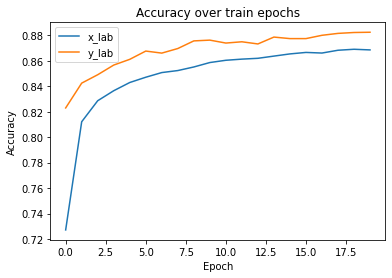

In [19]:
plt.plot(history_data_aumentada.history['accuracy'], label='x_lab')
plt.plot(history_data_aumentada.history['val_accuracy'], label='y_lab')
plt.title('Accuracy over train epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [20]:
predictions_au = model_da.predict(y_validation)

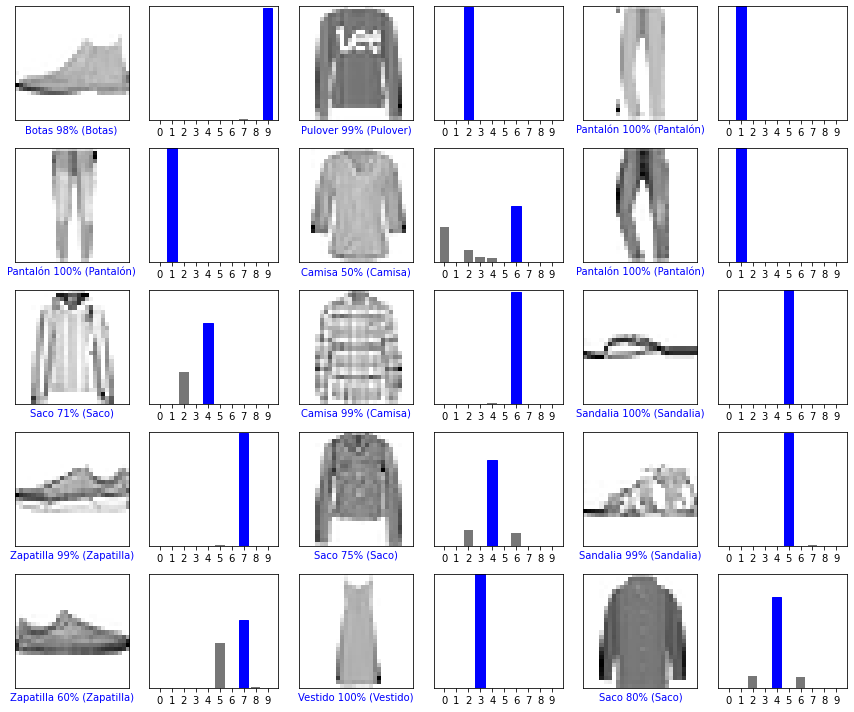

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_au[i], y_lab, y_validation)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_au[i], y_lab)
plt.tight_layout()
plt.show()

BatchNormalization

In [22]:
# el shape de los inputs es alto_imagen * ancho_imagen * cantidad_colores
model_bn2 = Sequential([
    
    Convolution2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dropout(0.2),

    Convolution2D(32, 3, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dropout(0.2),
    
    Convolution2D(64, 3, 3, input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dropout(0.2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(10, activation='softmax'),
])

In [23]:
model_bn2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy',],)

In [24]:
history_bn = model_bn2.fit(x_train_m, x_lab, epochs=30, batch_size=32, validation_data=(y_validation, y_lab))

Epoch 1/30
1875/1875 [==============================] - 20s 10ms/step - loss: 0.5758 - accuracy: 0.7905 - val_loss: 0.4004 - val_accuracy: 0.8502
Epoch 2/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4383 - accuracy: 0.8399 - val_loss: 0.3683 - val_accuracy: 0.8621
Epoch 3/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4016 - accuracy: 0.8515 - val_loss: 0.3499 - val_accuracy: 0.8699
Epoch 4/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3829 - accuracy: 0.8591 - val_loss: 0.3407 - val_accuracy: 0.8733
Epoch 5/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3678 - accuracy: 0.8647 - val_loss: 0.3375 - val_accuracy: 0.8745
Epoch 6/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3589 - accuracy: 0.8667 - val_loss: 0.3267 - val_accuracy: 0.8786
Epoch 7/30
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3499 - accuracy: 0.8708 - val_loss: 0.3190 -

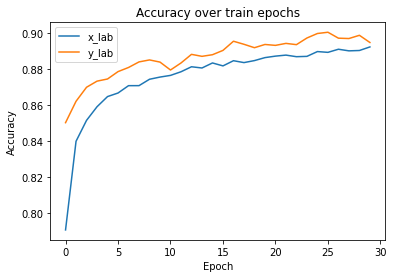

In [25]:
plt.plot(history_bn.history['accuracy'], label='x_lab')
plt.plot(history_bn.history['val_accuracy'], label='y_lab')
plt.title('Accuracy over train epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [26]:
predictions_bn = model_bn2.predict(y_validation)

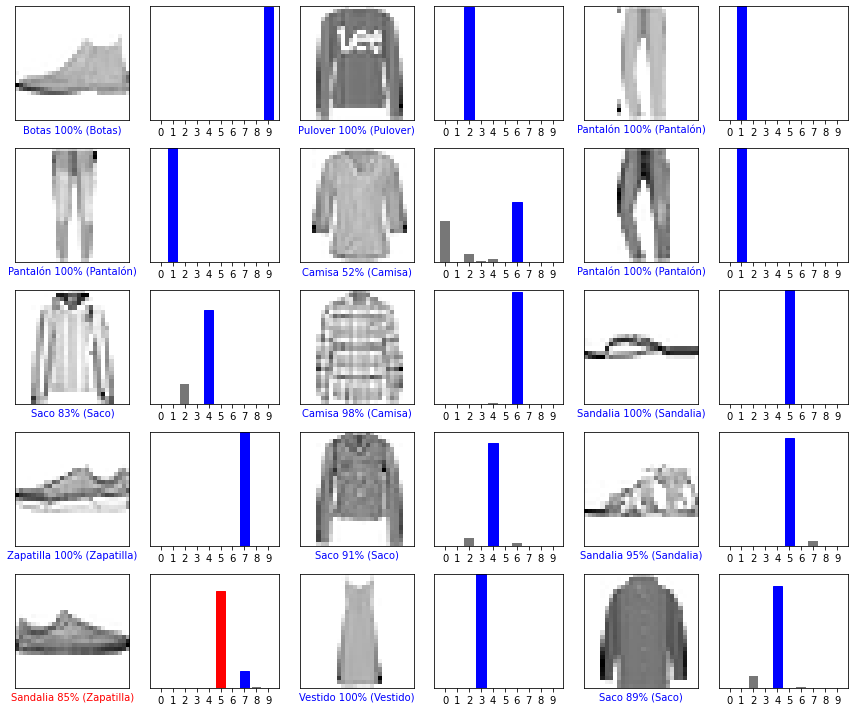

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_bn[i], y_lab, y_validation)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_bn[i], y_lab)
plt.tight_layout()
plt.show()